# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


In [2]:
del df['Ts']
del df['MaxD']
del df['MinD']

In [3]:
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = ["I", "Iu", "Imax", "E", "PIL", "Mb", "MeanD", "EDate"]
features = df[col_names]

scaler = MinMaxScaler()
X = scaler.fit_transform(features.values)# Contiene i valori su cui effettuare il clustering

X_complete=df.copy()# Contiene oltre agli attributi per il clustering anche il custemerID
X_complete[col_names] = X
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]]


## Stima valore Epsilon

In [5]:
from itertools import product
from scipy.spatial.distance import pdist, squareform

In [6]:
dist = pdist(X, 'euclidean') 
dist = squareform(dist)

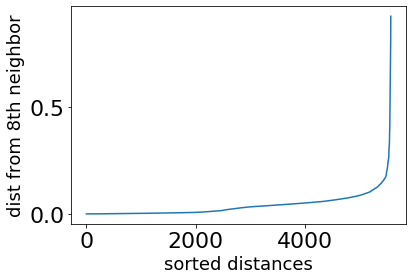

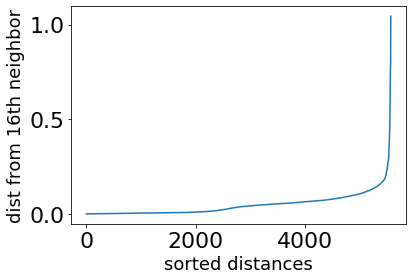

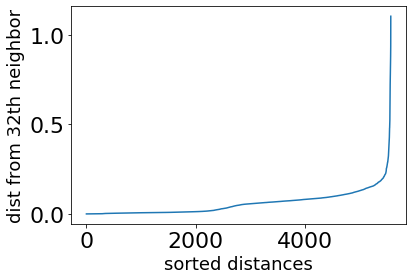

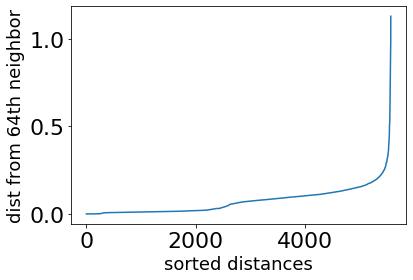

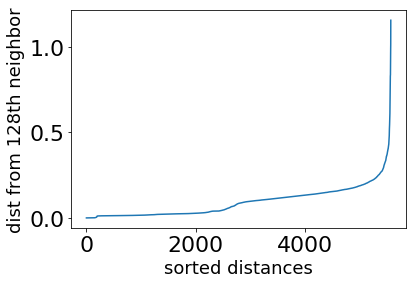

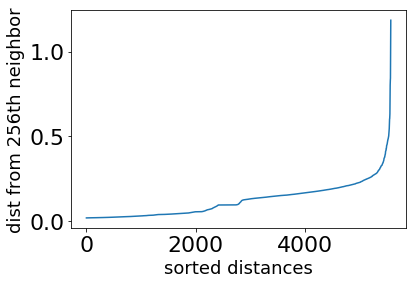

In [7]:
k=[8,16,32,64,128,256]
for current_k in k:
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[current_k]
        kth_distances.append(d[index_kth_distance])
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % current_k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

## Scelta valore minpoints

In [8]:

grid_params = {"minsamples": [3,14,20,50,100,150,170,180,200,250,300,350,400,450,500,550,600,700,800,1000],"eps":[0.10, 0.15, 0.20,0.25,0.30,0.35, 0.40]}

keys, values = zip(*grid_params.items())

params_list = [dict(zip(keys, v)) for v in product(*values)]
#print(params_list)

In [9]:
import statistics
import math
from pyclustering.cluster.optics import optics
from pyclustering.cluster.optics import ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.cluster.silhouette import silhouette
value_list = []
max_silhouette = 0


#Cerchiamo la miglior combinazione tra il valore di epsilon e MinPoints, trovate da KNN
for elem in params_list:

    optics_instance = optics(X, elem["eps"], elem["minsamples"])
    optics_instance.process()
    clusters = optics_instance.get_clusters()
    noise = optics_instance.get_noise()

    score=[elem for elem in silhouette(X, clusters).process().get_score() if not math.isnan(elem)]
    if(score!=[]):
        value=statistics.mean(score)
    else:
        value=0

    value_list.append(value)

    if(value > max_silhouette):
        max_silhouette = value
        print("******************")
        print("eps: "+str(elem['eps'])+" minsamples: "+str(elem['minsamples']))
        print("Numero clusters: ",len(clusters))
        clusterizzed=0
        for elem in clusters:
            clusterizzed+=len(elem)
        print("Numero elementi clusterizzati: ",clusterizzed)
        print("Num outliers: ",len(noise))
        print("Silhouette: ",value)
        print("*****************")

******************
eps: 0.1 minsamples: 3
Numero clusters:  2
Numero elementi clusterizzati:  5417
Num outliers:  158
Silhouette:  0.2160080075833475
*****************
******************
eps: 0.1 minsamples: 14
Numero clusters:  2
Numero elementi clusterizzati:  5274
Num outliers:  301
Silhouette:  0.7640618132703634
*****************
******************
eps: 0.1 minsamples: 20
Numero clusters:  2
Numero elementi clusterizzati:  5193
Num outliers:  382
Silhouette:  0.7777078006692032
*****************
******************
eps: 0.1 minsamples: 50
Numero clusters:  2
Numero elementi clusterizzati:  4960
Num outliers:  615
Silhouette:  0.7957880983099483
*****************
******************
eps: 0.15 minsamples: 250
Numero clusters:  2
Numero elementi clusterizzati:  4889
Num outliers:  686
Silhouette:  0.8011824391122191
*****************
******************
eps: 0.2 minsamples: 600
Numero clusters:  2
Numero elementi clusterizzati:  4823
Num outliers:  752
Silhouette:  0.8083516611256527
**

## Modello Finale

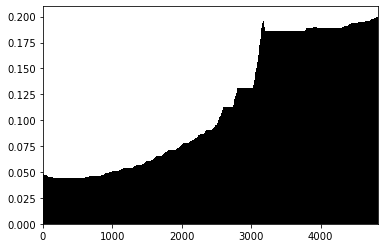

Numero Samples:  5575
Numero clusters:  2
Numero clusterizzati:  4823
Num outliers:  752


In [12]:

# Import required packages
from pyclustering.cluster.optics import optics
from pyclustering.cluster.optics import ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.cluster.silhouette import silhouette


optics_instance = optics(X, 0.2, 600)
# Run cluster analysis
optics_instance.process()
# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
# Obtain rechability-distances
ordering = ordering_analyser(optics_instance.get_ordering());
# Visualization of cluster ordering in line with reachability distance.
ordering_visualizer.show_ordering_diagram(ordering);

print("Numero Samples: ",len(X))
print("Numero clusters: ",len(clusters))
clusterizzed=0
for elem in clusters:
    clusterizzed+=len(elem)
print("Numero clusterizzati: ",clusterizzed)
print("Num outliers: ",len(noise))

In [13]:
score=[elem for elem in silhouette(X, clusters).process().get_score() if not math.isnan(elem)]
if(score!=[]):
    value=statistics.mean(score)
else:
    value=0
print(value)

0.8083516611256527
